## Variant analysis
Plot dN/dS results split by variant.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
os.chdir('/Users/cwagner2/Work/projects/covid/long-deletions/')

In [3]:
## Matplot lib settings
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize']= 12
mpl.rcParams['legend.fontsize']=10
mpl.rcParams['legend.title_fontsize']=12

In [4]:
nextstrain_clades = [
    '19A',
    '19B',
    '20A',
    '20B',
    '20C',
    '20D',
    '20E (EU1)',
    '20F',
    '20G',
    '20H (Beta,V2)',
    '20I (Alpha,V1)',
    '20J (Gamma,V3)',
    '21A (Delta)',
    '21B (Kappa)',
    '21C (Epsilon)',
    '21D (Eta)',
    '21F (Iota)',
    '21G (Lambda)',
    '21H (Mu)',
    '21I (Delta)',
    '21J (Delta)',
    '21K (Omicron)',
    '21L (Omicron)',
    '22A (Omicron)',
    '22B (Omicron)',
    '22C (Omicron)',
    '22D (Omicron)',
    '22E (Omicron)',
    '22F (Omicron)'
]

new_labels = {"23B (Omicron)" : "23B (XBB.1.16)", "23A (Omicron)" : "23A (XBB.1.5)", "22F (Omicron)" : "22F (XBB)","22E (Omicron)":"22E (BQ.1)", "22D (Omicron)" : "22D (BA.2.75)", "22C (Omicron)" : "22C (BA.2.12.1)", "22B (Omicron)" : "22B (BA.5)", "22A (Omicron)" : "22A (BA.4)"}

In [5]:
def load_results(lineages):
    results = []
    for lin in lineages:
        lin_trim = lin.split()[0]
        with open('usher/trimmed/' + lin_trim + '/' + lin_trim + '_dMdNdS_4degen.tsv','r') as f:
            df = pd.read_csv(f,sep='\t')
            df['clade'] = lin
            results.append(df)
    counts = pd.concat(results)
    return counts

def plot_orf8(results,lineages,new_labels,path=None):
    maxv = max(max(results['dStop_dS_max']),max(results['dN_dS_max']))
    locs = {lin:i for i,lin in enumerate(lineages)}
    fig, ax = plt.subplots(tight_layout=True,figsize=(7.2,2.3))
    ax.axhline(y=1, ls='dashed',c='black',zorder=1)
    filt = results[(results.gene=='ORF8')]
    ax.bar(filt['clade'].map(locs)-0.4,filt['dN_dS'], width=0.4,color='#2ec4b6',label='Missense',ec='#22544E',zorder=2)
    ax.bar(filt['clade'].map(locs),filt['dStop_dS'],width=0.4,color='#e71d36',label='Nonsense',ec='#9B0431',zorder=2)
    ax.errorbar(filt['clade'].map(locs)-0.4, filt['dN_dS'],yerr=[filt['dN_dS']-filt['dN_dS_min'],filt['dN_dS_max']-filt['dN_dS']],ecolor='k',capsize=2,fmt='none')
    ax.errorbar(filt['clade'].map(locs), filt['dStop_dS'],yerr=[filt['dStop_dS']-filt['dStop_dS_min'],filt['dStop_dS_max']-filt['dStop_dS']],ecolor='k',capsize=2,fmt='none')
        
    ax.set_ylabel('ORF8 dN/dS estimate')
    ax.legend(title='Mutation type',frameon=False)
    ax.set_yscale('log')
    ax.set_ylim(-0.05,10)
    ax.set_xlim(-1,29)
    #ax.set_ylim(-0.05,2.6)
    labels = [lin if lin not in new_labels.keys() else new_labels[lin] for lin in lineages]
    ax.set_xticks([locs[x]-0.2 for x in lineages],labels=labels,rotation=90)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

In [6]:
df = load_results(nextstrain_clades)
df = df.fillna(12)

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_38199/2277331743.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-0.05,10)


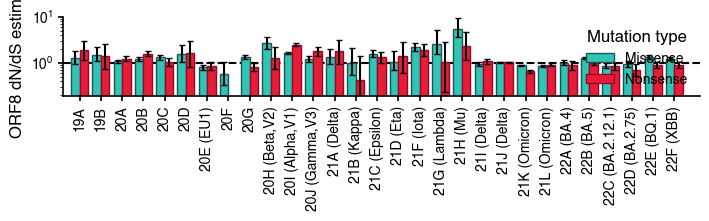

In [70]:
plot_orf8(df[df.clade.isin(nextstrain_clades)],nextstrain_clades,new_labels,'figs/supplemental/dNds_orf8_clade.pdf')

In [71]:
orf8 = df[(df.gene=='ORF8')]

In [72]:
orf8.clade

9               19A
9               19B
9               20A
9               20B
9               20C
9               20D
9         20E (EU1)
9               20F
9               20G
9     20H (Beta,V2)
9    20I (Alpha,V1)
9    20J (Gamma,V3)
9       21A (Delta)
9       21B (Kappa)
9     21C (Epsilon)
9         21D (Eta)
9        21F (Iota)
9      21G (Lambda)
9          21H (Mu)
9       21I (Delta)
9       21J (Delta)
9     21K (Omicron)
9     21L (Omicron)
9     22A (Omicron)
9     22B (Omicron)
9     22C (Omicron)
9     22D (Omicron)
9     22E (Omicron)
9     22F (Omicron)
Name: clade, dtype: object

In [73]:
orf8.head()

,gene,missense,nonsense,synonymous,undoStop,dS,dN,dStop,dN_dS,dStop_dS,...,dStop_min,dN_dS_min,dStop_dS_min,dS_max,dN_max,dStop_max,dN_dS_max,dStop_dS_max,CI,clade
9,ORF8,206,34,50,4.0,3.160892,4.051703,6.004256,1.281823,1.899545,...,4.061703,0.959721,1.173203,4.045942,4.622088,8.300001,1.784858,2.944446,95,19A
9,ORF8,171,18,35,12.0,2.212624,3.363307,3.178724,1.520053,1.436631,...,1.765958,1.088927,0.744920,2.971238,3.933692,4.768086,2.276847,2.523115,95,19B
9,ORF8,2667,338,764,78.0,48.298429,52.455784,59.689368,1.086076,1.235845,...,53.155325,1.004522,1.078102,51.775410,54.599647,66.223411,1.183037,1.404489,95,20A
9,ORF8,2376,348,613,44.0,38.752535,46.732262,61.455326,1.205915,1.585840,...,54.921282,1.102273,1.387909,41.913427,48.777782,68.165965,1.321324,1.810115,95,20B
9,ORF8,1500,132,351,1.0,22.189461,29.502691,23.310641,1.329581,1.050528,...,19.248938,1.184623,0.851848,24.591739,31.154842,27.548939,1.498426,1.288645,95,20C


In [74]:
st.wilcoxon(orf8.dN,orf8.dS,alternative='greater')

WilcoxonResult(statistic=333.0, pvalue=0.005660833790898323)

In [75]:
st.wilcoxon(orf8.dStop,orf8.dS,alternative='greater')

WilcoxonResult(statistic=251.0, pvalue=0.24059807881712914)

In [76]:
df[(df.gene=='ORF8')&(df.dStop_dS_max<1)][['clade','dStop_dS','dStop_dS_min','dStop_dS_max']]

,clade,dStop_dS,dStop_dS_min,dStop_dS_max
9,20F,0.000000,0.000000,0.000000
9,20G,0.823070,0.669200,0.997660
9,21K (Omicron),0.656624,0.603659,0.710750
9,21L (Omicron),0.916953,0.842606,0.995698
9,22D (Omicron),0.715123,0.531624,0.931149


In [77]:
df[df.clade=='21H (Mu)']

,gene,missense,nonsense,synonymous,undoStop,dS,dN,dStop,dN_dS,dStop_dS,...,dStop_min,dN_dS_min,dStop_dS_min,dS_max,dN_max,dStop_max,dN_dS_max,dStop_dS_max,CI,clade
0,E,22,0,19,0.0,1.334973,0.702125,0.000000,0.525947,0.000000,...,0.000000,0.276486,0.000000,1.967328,1.021273,0.000000,1.022011,0.000000,95,21H (Mu)
1,M,72,0,117,0.0,2.937992,0.713338,0.000000,0.242798,0.000000,...,0.000000,0.180267,0.000000,3.490435,0.881764,0.000000,0.322466,0.000000,95,21H (Mu)
2,N,367,0,193,0.0,2.743708,1.778517,0.000000,0.648216,0.000000,...,0.000000,0.541213,0.000000,3.141759,1.991745,0.000000,0.778327,0.000000,95,21H (Mu)
3,ORF1a,1802,0,1326,0.0,2.357319,0.916839,0.000000,0.388933,0.000000,...,0.000000,0.362899,0.000000,2.492430,0.962630,0.000000,0.418321,0.000000,95,21H (Mu)
4,ORF1b,932,1,776,0.0,2.234166,0.779535,0.010535,0.348915,0.004716,...,0.000000,0.316789,0.000000,2.398274,0.835574,0.031606,0.385237,0.014855,95,21H (Mu)
5,ORF3a,392,3,129,0.0,3.020002,3.225786,0.279293,1.068140,0.092481,...,0.000000,0.876287,0.000000,3.535041,3.579635,0.651684,1.314461,0.213037,95,21H (Mu)
6,ORF6,33,2,17,0.0,2.427614,1.544749,0.634872,0.636324,0.261521,...,0.000000,0.359022,0.000000,3.570021,2.059665,1.587181,1.221812,0.808338,95,21H (Mu)
7,ORF7a,160,13,38,0.0,2.063491,3.075912,2.441924,1.490635,1.183395,...,1.127042,1.069298,0.553465,2.715120,3.575747,3.756807,2.209120,2.114082,95,21H (Mu)
8,ORF7b,38,2,6,3.0,0.779852,2.654940,1.159098,3.404417,1.486305,...,0.000000,1.666372,0.000000,1.429728,3.563209,2.897744,11.563818,6.688374,95,21H (Mu)
9,ORF8,333,16,19,0.0,1.201139,6.549597,2.825532,5.452822,2.352378,...,1.589362,3.622327,1.142774,1.770099,7.336336,4.238298,9.618855,4.655747,95,21H (Mu)


## Cluster sizes

In [11]:
with open('usher/trimmed/clades_nested/ORF8_clades.tsv','r') as f:
    clusters = pd.read_csv(f,sep='\t')

with open('usher/trimmed/node_clades.tsv','r') as f:
    clades = pd.read_csv(f, sep='\t')

clusters = clusters.merge(clades,how='left',right_on='node',left_on='node_id')

In [12]:
clusters.clade.unique()

array(['19A', '19B', '20A', '21B (Kappa)', '21A (Delta)', '21J (Delta)',
       '21I (Delta)', '20H (Beta,V2)', '20E (EU1)', '21D (Eta)', '20C',
       '21C (Epsilon)', '21F (Iota)', '21H (Mu)', '20G', '20B',
       '21E (Theta)', '20D', '21G (Lambda)', '20F', '21K (Omicron)',
       '21L (Omicron)', '22F (Omicron)', '22D (Omicron)', '22C (Omicron)',
       '22B (Omicron)', '22E (Omicron)', '22A (Omicron)', '21M (Omicron)',
       '20I (Alpha,V1)', '20J (Gamma,V3)'], dtype=object)

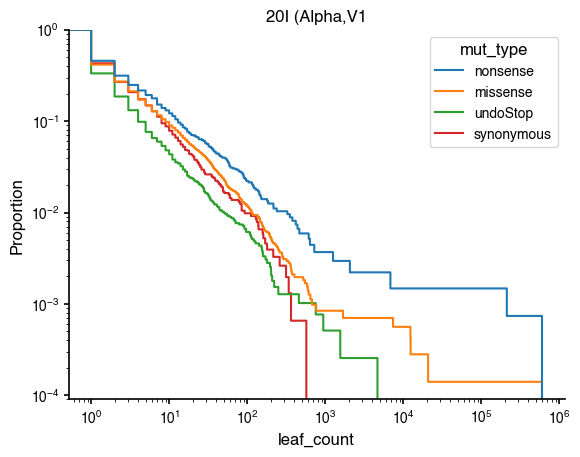

In [80]:
dataset = clusters[clusters.clade=='20I (Alpha,V1)']
ax = sns.ecdfplot(dataset,x='leaf_count',hue='mut_type',log_scale=True,complementary=True)
ax.set_title('20I (Alpha,V1')
ax.set_yscale('log')

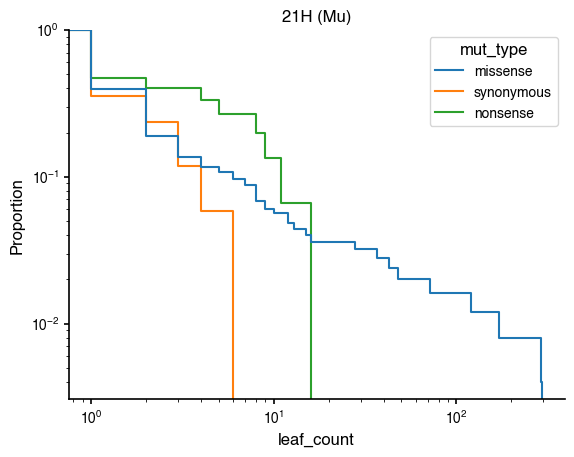

In [81]:
dataset = clusters[clusters.clade=='21H (Mu)']
ax = sns.ecdfplot(dataset,x='leaf_count',hue='mut_type',log_scale=True,complementary=True)
ax.set_title('21H (Mu)')
ax.set_yscale('log')

In [82]:
dataset

,node_id,aa_mutations,nt_mutations,codon_change,mut_type,branch_muts_counts,gene,leaf_count,mut_count,mut_density,rev_from_lineage,days_circulated,date_observed,parent,cluster,node,clade
48757,node_644803,ORF8:F67S,T28093C,TTT>TCT,missense,1,ORF8,3,6,2.0,1,105,2021-04-16,node_644802,48758,node_644803,21H (Mu)
48758,node_644804,ORF1a:I2057T;ORF1a:V2865I;ORF1b:A520V;ORF8:S67F,T6435C;G8858A;C15026T;C28093T,ATA>ACA;GTC>ATC;GCA>GTA;TCT>TTT,missense,4,ORF8,2,4,2.0,1,1,2021-04-16,node_644803,48759,node_644804,21H (Mu)
48759,node_644806,ORF1a:F2386F;ORF1a:A3610A;ORF1b:G1217G;ORF1b:P...,C7423T;C11095T;C17118T;C20404T;G28028T,TTC>TTT;GCC>GCT;GGC>GGT;CCT>TCT;TGG>TGT,missense,5,ORF8,7,21,3.0,0,30,2021-07-02,node_644805,48760,node_644806,21H (Mu)
48760,USA/FL-CDC-ASC210207708/2021|OK016396.1|2021-0...,ORF1a:R3729Q;M:L35L;ORF8:F67S,G11451A;C26625T;T28093C,CGA>CAA;CTA>TTA;TTT>TCT,missense,3,ORF8,1,3,3.0,2,0,2021-08-01,node_644807,48761,USA/FL-CDC-ASC210207708/2021|OK016396.1|2021-0...,21H (Mu)
48761,node_644817,S:T20T;ORF8:F67S,C21622T;T28093C,ACC>ACT;TTT>TCT,missense,2,ORF8,2,2,1.0,1,7,2021-09-09,node_644814,48762,node_644817,21H (Mu)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49033,USA/OR-CDC-ASC210237258/2021|OK026748.1|2021-0...,ORF1a:F924F;ORF1b:G1323G;ORF8:Q91*,T3037C;C17436T;C28164T,TTT>TTC;GGC>GGT;CAG>TAG,nonsense,3,ORF8,1,3,3.0,1,0,2021-07-30,node_646438,49034,USA/OR-CDC-ASC210237258/2021|OK026748.1|2021-0...,21H (Mu)
49034,USA/FL-CDC-ASC210113657/2021|OK295582.1|2021-0...,ORF8:F67S,T28093C,TTT>TCT,missense,1,ORF8,1,1,1.0,1,0,2021-07-10,node_646453,49035,USA/FL-CDC-ASC210113657/2021|OK295582.1|2021-0...,21H (Mu)
49035,node_646462,ORF8:F67S,T28093C,TTT>TCT,missense,1,ORF8,3,6,2.0,1,56,2021-06-21,node_646461,49036,node_646462,21H (Mu)
49036,USA/FL-CDC-ASC210202952/2021|OK026038.1|2021-0...,ORF8:F67S,T28093C,TTT>TCT,missense,1,ORF8,1,1,1.0,1,0,2021-07-30,node_646466,49037,USA/FL-CDC-ASC210202952/2021|OK026038.1|2021-0...,21H (Mu)


In [83]:
def bootstrap_clusterSize(clade, mut_type,sizes=[],n=20):
    clade = clusters[(clusters.clade==clade) & (clusters.mut_type==mut_type)]
    
    for i in range(n):
        sample = clade.sample(n=len(clade),replace=True)
        size = np.mean(np.log10(sample.leaf_count))
        sizes.append(size)
    return sizes
    

In [84]:
def bootstrap_clades(clusters,n=20):
    results = {}
    for clade in clusters.clade.unique():
        print(f'Starting {clade}')
        results[clade] = {}
        filt = clusters[clusters.clade==clade]
        for mut_type in clusters[clusters.clade==clade].mut_type.unique():
                results[clade][mut_type] = []
        for i in range(n):
            if i % 5000 == 0:
                print(f'on iteration: {i}')
            sample = filt.sample(n=len(filt),replace=True)
            for mut_type in clusters[clusters.clade==clade].mut_type.unique():
                results[clade][mut_type].append(np.mean(np.log10(sample[sample.mut_type==mut_type].leaf_count)))
    return results

In [85]:
bootstrap = bootstrap_clades(clusters,10000)

Starting 19A
on iteration: 0
on iteration: 5000
Starting 19B
on iteration: 0
on iteration: 5000
Starting 20A
on iteration: 0
on iteration: 5000
Starting 21B (Kappa)
on iteration: 0
on iteration: 5000
Starting 21A (Delta)
on iteration: 0
on iteration: 5000
Starting 21J (Delta)
on iteration: 0
on iteration: 5000
Starting 21I (Delta)
on iteration: 0
on iteration: 5000
Starting 20H (Beta,V2)
on iteration: 0
on iteration: 5000
Starting 20E (EU1)
on iteration: 0
on iteration: 5000
Starting 21D (Eta)
on iteration: 0
on iteration: 5000
Starting 20C
on iteration: 0
on iteration: 5000
Starting 21C (Epsilon)
on iteration: 0
on iteration: 5000
Starting 21F (Iota)
on iteration: 0
on iteration: 5000
Starting 21H (Mu)
on iteration: 0
on iteration: 5000
Starting 20G
on iteration: 0
on iteration: 5000
Starting 20B
on iteration: 0
on iteration: 5000
Starting 21E (Theta)
on iteration: 0
on iteration: 5000
Starting 20D
on iteration: 0
on iteration: 5000
Starting 21G (Lambda)
on iteration: 0
on iteration: 

In [104]:
def get_ci(results):
    variants = []
    mutTypes = []
    min_cis = []
    max_cis = []
    for clade in results.keys():
        for mut_type in results[clade].keys():
            bootstrap = np.array(results[clade][mut_type])
            min_cis.append(np.quantile(bootstrap,0.025))
            max_cis.append(np.quantile(bootstrap,0.975))
            variants.append(clade)
            mutTypes.append(mut_type)

    size_ci = pd.DataFrame({'clade':variants,'mut_type':mutTypes,'min_ci':min_cis,'max_ci':max_cis})
    return size_ci

In [105]:
CIs = get_ci(bootstrap)

In [106]:
CIs

,clade,mut_type,min_ci,max_ci
0,19A,missense,0.112076,0.231775
1,19A,synonymous,0.061228,0.269167
2,19A,nonsense,0.145802,0.447986
3,19A,undoStop,NaN,NaN
4,19B,missense,0.195020,0.360959
...,...,...,...,...
101,"20I (Alpha,V1)",synonymous,0.269143,0.313948
102,"20J (Gamma,V3)",synonymous,0.158888,0.259694
103,"20J (Gamma,V3)",missense,0.166039,0.224608
104,"20J (Gamma,V3)",nonsense,0.101536,0.288142


In [107]:
clusters['logLeaf'] = np.log10(clusters['leaf_count'])
averages = clusters.groupby(['clade','mut_type'])['logLeaf'].mean().reset_index(name='logSize')
sizes = averages.merge(CIs,how='outer')

In [108]:
sizes

,clade,mut_type,logSize,min_ci,max_ci
0,19A,missense,0.165668,0.112076,0.231775
1,19A,nonsense,0.282663,0.145802,0.447986
2,19A,synonymous,0.154502,0.061228,0.269167
3,19A,undoStop,0.471623,NaN,NaN
4,19B,missense,0.273020,0.195020,0.360959
...,...,...,...,...,...
101,22E (Omicron),synonymous,0.248006,0.215214,0.282307
102,22F (Omicron),missense,0.217313,0.202887,0.231900
103,22F (Omicron),nonsense,0.259000,0.199838,0.327552
104,22F (Omicron),synonymous,0.252736,0.223269,0.284122


In [109]:
sizes.to_csv('usher/trimmed/clades_nested/ORF8_logClustSize_bootstrapped.tsv',sep='\t',index=False)

In [13]:
with open('usher/trimmed/clades_nested/ORF8_logClustSize_bootstrapped.tsv','r') as f:
    sizes = pd.read_csv(f, sep='\t')

In [111]:
sizes.head()

,clade,mut_type,logSize,min_ci,max_ci
0,19A,missense,0.165668,0.112076,0.231775
1,19A,nonsense,0.282663,0.145802,0.447986
2,19A,synonymous,0.154502,0.061228,0.269167
3,19A,undoStop,0.471623,NaN,NaN
4,19B,missense,0.273020,0.195020,0.360959


In [112]:
widesizes = sizes.pivot(index='clade',columns='mut_type',values='logSize')

In [113]:
widesizes.head()

mut_type,missense,nonsense,synonymous,undoStop
clade,,,,
19A,0.165668,0.282663,0.154502,0.471623
19B,0.273020,0.197173,0.301574,NaN
20A,0.295452,0.360724,0.263336,0.244825
20B,0.293661,0.324870,0.308460,0.260347
20C,0.299426,0.358223,0.321062,NaN


In [114]:
widesizes['missyn'] = widesizes['missense']/widesizes['synonymous']

In [115]:
widesizes['nonsyn'] = widesizes['nonsense']/widesizes['synonymous']

In [116]:
widesizes.shape

(31, 6)

In [117]:
widesizes = widesizes.reset_index()

In [118]:
noNA = widesizes[(widesizes.nonsense.notna()) &(widesizes.clade!='21M (Omicron)') & (widesizes.clade!='21E (Theta')]

In [119]:
st.wilcoxon(widesizes.missense,widesizes.synonymous,alternative='greater')

WilcoxonResult(statistic=188.0, pvalue=0.8802613760344684)

In [120]:
st.wilcoxon(noNA.nonsense,noNA.synonymous,alternative='greater')

WilcoxonResult(statistic=216.0, pvalue=0.3896491266787052)

In [121]:
def plot_orf8Size(df,lineages,new_labels,variable='logSize',path=None,vline=False,offsets=[-0.5,0,0.5],height=0.5, xlab='Average log10(cluster size)',ymax=None,log=False):
    fig, ax = plt.subplots(tight_layout=True,figsize=(12,4))
    colors = ['#ff9f1c','#2EC4B6','#e71d36']
    ecolors = ['#6C430C','#22544E','#9B0431']
    locs = {lin:i*2 for i,lin in enumerate(df.clade.unique())}
    for mutType,offset,color,ecolor,label in zip(['synonymous','missense','nonsense'],offsets,colors, ecolors,['Synonymous','Missense','Nonsense']):
        filt = df[df.mut_type==mutType]
        if len(filt):
            ax.bar(filt['clade'].map(locs)+offset,filt[variable], width=height,color=color,label=label,ec=ecolor,zorder=1)
            ax.errorbar(filt['clade'].map(locs)+offset,filt[variable], yerr=[filt['min_ci'],filt['max_ci']],ecolor=ecolor,capsize=2,fmt='none',zorder=2)
    if vline==True:
        ax.axhline(y=1,ls='dashed',color='k')
    ax.set_ylabel(xlab)
    ax.legend(title='Mutation type',frameon=False)
    labels = [lin if lin not in new_labels.keys() else new_labels[lin] for lin in lineages]
    ax.set_xticks([locs[x] for x in lineages],labels=labels,rotation=90)
    ax.set_xlim(-1,61)
    if log==True:
        ax.set_yscale('log')
    if ymax:
        ax.set_ylim(0,ymax)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

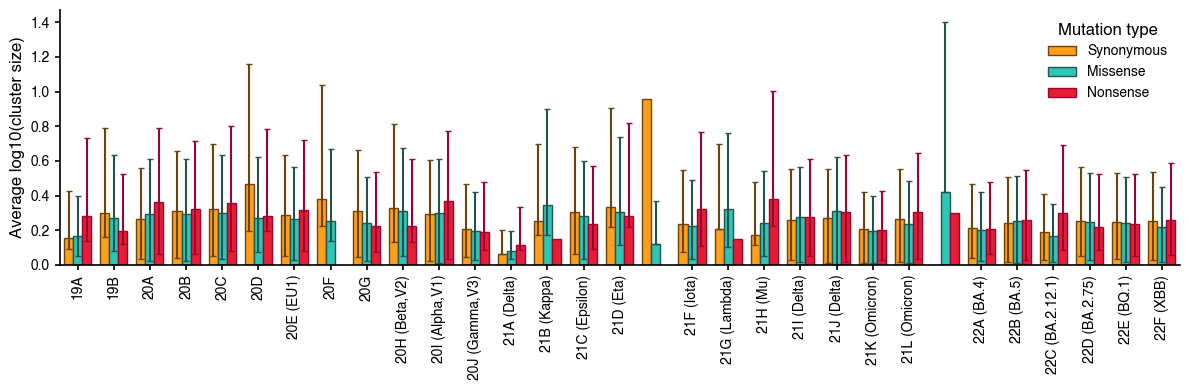

In [122]:
plot_orf8Size(sizes,nextstrain_clades,new_labels)

In [123]:
def get_scaled_ci(bootstrap):
    variants = []
    mutTypes = []
    min_cis = []
    max_cis = []
    for clade in bootstrap.keys():
        for mut in ['missense','nonsense']:
            if mut in bootstrap[clade].keys() and 'synonymous' in bootstrap[clade].keys():
                syn = np.array(bootstrap[clade]['synonymous'])
                nonsyn = np.array(bootstrap[clade][mut])
                scaled = nonsyn[syn!=0]/syn[syn!=0]
                zeros = len(syn[syn==0])
                scaled = np.concatenate((scaled,np.repeat(np.inf,zeros)))
                min_cis.append(np.quantile(scaled,0.025))
                max_cis.append(np.quantile(scaled,0.975))
                variants.append(clade)
                mutTypes.append(mut)

    size_ci = pd.DataFrame({'clade':variants,'mut_type':mutTypes,'min_ci':min_cis,'max_ci':max_cis})
    return size_ci

In [124]:
scaled_ci = get_scaled_ci(bootstrap)

/Users/cwagner2/miniconda3/envs/orf8ko/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [125]:
scaled_ci

,clade,mut_type,min_ci,max_ci
0,19A,missense,0.552334,2.886885
1,19A,nonsense,0.777645,5.123262
2,19B,missense,0.497052,2.034389
3,19B,nonsense,0.232854,1.610365
4,20A,missense,0.974830,1.296717
5,20A,nonsense,1.092138,1.694857
6,21B (Kappa),missense,0.543612,4.750543
7,21B (Kappa),nonsense,NaN,NaN
8,21A (Delta),missense,0.481113,NaN
9,21A (Delta),nonsense,0.413429,NaN


In [126]:
np.repeat(np.inf,2)

array([inf, inf])

In [127]:
def add_scaled(averages):
    scaled = []
    for row in averages.index:
        clade = averages.at[row,'clade']
        leafSize = averages.at[row,'logSize']
        synSize = averages[(averages.clade==clade) & (averages.mut_type=='synonymous')]['logSize'].values[0]
        scaled.append(leafSize/synSize)
    averages['scaled'] = scaled
    return averages

In [133]:
scaled_avg = add_scaled(averages)
scaled = scaled_avg[scaled_avg.mut_type.isin(['nonsense','missense'])].merge(scaled_ci,how='outer')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_38199/412809791.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  scaled.append(leafSize/synSize)
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_38199/412809791.py:7: RuntimeWarning: invalid value encountered in double_scalars
  scaled.append(leafSize/synSize)


In [134]:
scaled['min_ci'] = scaled.min_ci.fillna(0)
scaled['max_ci'] = scaled.max_ci.fillna(20)

In [135]:
scaled.to_csv('usher/trimmed/clades_nested/ORF8_logClustSize_adjusted_bootstrapped.tsv',sep='\t',index=False)

In [14]:
with open('usher/trimmed/clades_nested/ORF8_logClustSize_adjusted_bootstrapped.tsv','r') as f:
    scaled = pd.read_csv(f,sep='\t')

In [136]:
def plot_size_count(results,df,lineages,new_labels,variable='logSize',path=None,offsets=[-0.4,0],ymax=None,log=False):
    fig, ax = plt.subplots(tight_layout=True,figsize=(7.2,4.7),nrows=2,sharex=True)
    maxv = max(max(results['dStop_dS_max']),max(results['dN_dS_max']))
    locs = {lin:i for i,lin in enumerate(lineages)}
    ax[0].axhline(y=1, ls='dashed',c='black',zorder=1)
    filt = results[(results.gene=='ORF8')]
    ax[0].bar(filt['clade'].map(locs)-0.4,filt['dN_dS'], width=0.4,color='#2ec4b6',label='Missense',ec='#22544E',zorder=2)
    ax[0].bar(filt['clade'].map(locs),filt['dStop_dS'],width=0.4,color='#e71d36',label='Nonsense',ec='#9B0431',zorder=2)
    ax[0].errorbar(filt['clade'].map(locs)-0.4, filt['dN_dS'],yerr=[filt['dN_dS']-filt['dN_dS_min'],filt['dN_dS_max']-filt['dN_dS']],ecolor='k',capsize=2,fmt='none')
    ax[0].errorbar(filt['clade'].map(locs), filt['dStop_dS'],yerr=[filt['dStop_dS']-filt['dStop_dS_min'],filt['dStop_dS_max']-filt['dStop_dS']],ecolor='k',capsize=2,fmt='none')
        
    ax[0].set_ylabel('dN/dS')
    ax[0].legend(title='Mutation type',frameon=False)
    ax[0].set_yscale('log')
    ax[0].set_ylim(-0.05,10)
    ax[0].set_xlim(-1,29)
    labels = [lin if lin not in new_labels.keys() else new_labels[lin] for lin in lineages]
    ax[1].set_xticks([locs[x]-0.2 for x in lineages],labels=labels,rotation=90)
    
    colors = ['#2EC4B6','#e71d36']
    ecolors = ['#22544E','#9B0431']
    for mutType,offset,color,ecolor,label in zip(['missense','nonsense'],offsets,colors, ecolors,['Missense','Nonsense']):
        filt = df[df.mut_type==mutType]
        if len(filt):
            ax[1].errorbar(filt['clade'].map(locs)+offset,filt[variable], yerr=[filt['min_ci'],filt['max_ci']],color=color,ecolor=ecolor,capsize=0,fmt='d',zorder=2,markersize=7)
    ax[1].axhline(y=1,ls='dashed',color='k')
    ax[1].set_ylabel('NS/S ratio of geom\nmean cluster size')
    ax[1].set_yscale('log')
    if ymax:
        ax[1].set_ylim(0,ymax)
        
    
    ax[0].text(x=-4,y=10,s='A',fontdict={'fontsize': 18,'fontweight' : 'black','horizontalalignment':'left'})
    ax[1].text(x=-4,y=13, s='B',fontdict={'fontsize': 18,'fontweight' : 'black','horizontalalignment':'left'})
        
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_38199/843577257.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(-0.05,10)
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_38199/843577257.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0,ymax)


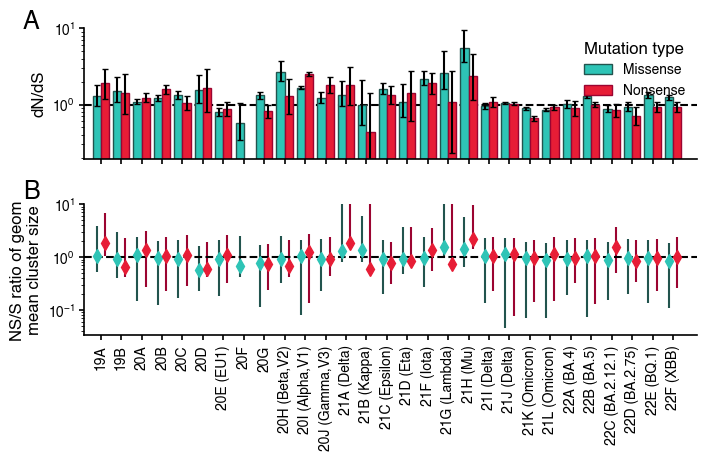

In [137]:
plot_size_count(df,scaled[scaled.clade.isin(nextstrain_clades)],nextstrain_clades,new_labels,variable='scaled',ymax=10,log=True,path='figs/supplemental/orf8_clade_countSize.pdf')#

## Plot both

In [18]:
def get_size_ratio(df):
    clades = []
    mut_types =[]
    syn_ratios = []
    for clade in df.clade.unique():
        for mutType in ['missense','nonsense']:
            if len(df[(df.clade==clade)&(df.mut_type==mutType)]['maxClustSize'].values):
                size = df[(df.clade==clade)&(df.mut_type==mutType)]['maxClustSize'].values[0]
                syn_size = df[(df.clade==clade)&(df.mut_type=='synonymous')]['maxClustSize'].values[0]
                syn_ratio = size/syn_size
                syn_ratios.append(syn_ratio)
                clades.append(clade)
                mut_types.append(mutType)
        
    df = pd.DataFrame({'clade':clades,'mut_type':mut_types,'synRatio':syn_ratios})
    return df
        

In [139]:
clusters

,node_id,aa_mutations,nt_mutations,codon_change,mut_type,branch_muts_counts,gene,leaf_count,mut_count,mut_density,rev_from_lineage,days_circulated,date_observed,parent,cluster,node,clade,logLeaf
0,England/SHEF-BFFC7/2020|2020-03-25,ORF8:W45L,G28027T,TGG>TTG,missense,1,ORF8,1,1,1.00000,0,0,2020-03-25,node_3,1,England/SHEF-BFFC7/2020|2020-03-25,19A,0.000000
1,Northern_Ireland/NIRE-1082A7/2020|2020-04-01,ORF8:F6F,C27911T,TTC>TTT,synonymous,1,ORF8,1,1,1.00000,0,0,2020-04-01,node_27,2,Northern_Ireland/NIRE-1082A7/2020|2020-04-01,19A,0.000000
2,England/ALDP-9ED149/2020|OA993758.1|2020-05-05,M:R158L;ORF8:K68R,G26995T;A28096G,CGC>CTC;AAA>AGA,missense,2,ORF8,1,2,2.00000,0,0,2020-05-05,node_30,3,England/ALDP-9ED149/2020|OA993758.1|2020-05-05,19A,0.000000
3,node_32,ORF1a:A138T;ORF1a:L1559I;ORF8:P56L,G677A;C4940A;C28060T,GCC>ACC;CTT>ATT;CCT>CTT,missense,3,ORF8,4,3,0.75000,0,44,2020-03-18,node_24,4,node_32,19A,0.602060
4,node_35,ORF1a:V3595G;ORF1b:S936S;ORF1b:F1850F;ORF8:A65...,T11049G;A16275G;C19017T;T28088A;G28337T;G28337T,GTC>GGC;TCA>TCG;TTC>TTT;GCT>GCA;GAT>TAT;CAG>CAT,synonymous,6,ORF8,7,39,5.57143,0,108,2020-10-19,node_34,5,node_35,19A,0.845098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111784,Scotland/CVR170/2020|2020-03-17,ORF1b:A1547S;ORF8:D119Y,G18106T;G28248T,GCA>TCA;GAT>TAT,missense,2,ORF8,1,2,2.00000,0,0,2020-03-17,node_1,111785,Scotland/CVR170/2020|2020-03-17,19A,0.000000
111785,England/BRIS-130CD5/2020|OA967032.1|2020-03-23,ORF1a:L3736F;S:D1260E;ORF8:H17Y,C11471T;C25342A;C27942T,CTT>TTT;GAC>GAA;CAC>TAC,missense,3,ORF8,1,3,3.00000,0,0,2020-03-23,node_1,111786,England/BRIS-130CD5/2020|OA967032.1|2020-03-23,19A,0.000000
111786,node_1421934,ORF1b:T677T;ORF8:T11K,A15498T;C27925A,ACA>ACT;ACA>AAA,missense,2,ORF8,2,2,1.00000,0,28,2020-04-14,node_1421933,111787,node_1421934,19A,0.301030
111787,Wuhan_A167/human/2020/CHN|GWHALPN01000001|2020...,ORF8:I74I,C28115T,ATC>ATT,synonymous,1,ORF8,1,1,1.00000,0,0,2020-01-25,node_1,111788,Wuhan_A167/human/2020/CHN|GWHALPN01000001|2020...,19A,0.000000


In [15]:
counts_wide = df[df.gene=='ORF8'][['dN_dS','dStop_dS','dN_dS_min','dStop_dS_min','dN_dS_max','dStop_dS_max','clade']].reset_index(drop=True)
mapper = {'dN_dS':'missense','dStop_dS':'nonsense','dN_dS_min':'missense','dStop_dS_min':'nonsense','dN_dS_max':'missense','dStop_dS_max':'nonsense',}
counts_values = pd.melt(counts_wide,id_vars=['clade'],value_vars=['dN_dS','dStop_dS'],var_name='mut_type',value_name='dnds')
counts_values['mut_type'] = counts_values['mut_type'].map(mapper)
counts_min = pd.melt(counts_wide,id_vars=['clade'],value_vars=['dN_dS_min','dStop_dS_min'],var_name='mut_type',value_name='min_dnds')
counts_min['mut_type'] = counts_min['mut_type'].map(mapper)
counts_max = pd.melt(counts_wide,id_vars=['clade'],value_vars=['dN_dS_max','dStop_dS_max'],var_name='mut_type',value_name='max_dnds')
counts_max['mut_type'] = counts_max['mut_type'].map(mapper)


counts = counts_values.merge(counts_max,how='outer').merge(counts_min,how='outer')

In [16]:
mutMapper = {'(Intercept)':'synonymous','mut_typemissense':'missense','mut_typenonsense':'nonsense'}
with open('usher/trimmed/clusterGrowthRate_clade.tsv','r') as f:
    rates = pd.read_csv(f,sep='\t').rename(columns={'97.5 %':'deltaMax','2.5 %':'deltaMin','Clade':'clade'})
rates['mut_type'] = rates['Variable'].map(mutMapper)

    

In [19]:
agg = clusters.groupby(['mut_type','clade'])['leaf_count'].max().reset_index(name='maxClustSize')
ratios = get_size_ratio(agg)

In [20]:
agg

,mut_type,clade,maxClustSize
0,missense,19A,6493
1,missense,19B,679
2,missense,20A,77473
3,missense,20B,601902
4,missense,20C,11352
...,...,...,...
101,undoStop,21K (Omicron),11
102,undoStop,21L (Omicron),41
103,undoStop,22B (Omicron),20
104,undoStop,22C (Omicron),7


In [21]:
selection = counts.merge(scaled,how='outer').merge(rates,how='outer').merge(ratios,how='outer')


In [22]:
selection2 = counts.merge(rates,how='outer').merge(ratios,how='outer')


In [146]:
selection2.columns

Index(['clade', 'mut_type', 'dnds', 'max_dnds', 'min_dnds', 'Variable',
       'Fold_change', 'deltaMin', 'deltaMax', 'synRatio'],
      dtype='object')

In [23]:
selection.head()

,clade,mut_type,dnds,max_dnds,min_dnds,logSize,scaled,min_ci,max_ci,Variable,Fold_change,deltaMin,deltaMax,synRatio
0,19A,missense,1.281823,1.784858,0.959721,0.165668,1.072271,0.552334,2.886885,mut_typemissense,11.312279,2.123308,40.283387,158.365854
1,19B,missense,1.520053,2.276847,1.088927,0.273020,0.905317,0.497052,2.034389,mut_typemissense,1.928532,0.491697,5.704155,11.316667
2,20A,missense,1.086076,1.183037,1.004522,0.295452,1.121961,0.974830,1.296717,mut_typemissense,4.551961,3.370136,6.057722,44.068828
3,20B,missense,1.205915,1.321324,1.102273,0.293661,0.952021,0.825556,1.108583,NaN,NaN,NaN,NaN,121.449153
4,20C,missense,1.329581,1.498426,1.184623,0.299426,0.932611,0.765655,1.149171,mut_typemissense,4.221004,2.662789,6.447617,5.145966


In [149]:
selection[selection.max_ci<1]

,clade,mut_type,dnds,max_dnds,min_dnds,logSize,scaled,min_ci,max_ci,Variable,Fold_change,deltaMin,deltaMax,synRatio
8,20G,missense,1.325046,1.478602,1.198634,0.243410,0.787765,0.672227,0.931343,mut_typemissense,0.823269,0.613079,1.089626,3.048128
22,21L (Omicron),missense,0.854400,0.898813,0.814434,0.236040,0.885587,0.816218,0.965898,mut_typemissense,0.815619,0.702165,0.944487,0.602333
28,22F (Omicron),missense,1.241569,1.347433,1.145781,0.217313,0.859843,0.752280,0.988937,mut_typemissense,0.422001,0.337464,0.523325,0.068733


In [28]:
source = selection[(selection.mut_type!='synonymous') & (selection.clade.isin(nextstrain_clades))]
source['geomMean_clusterSize_ratio'] = source['scaled']
source[['clade','mut_type','dnds','max_dnds','min_dnds','geomMean_clusterSize_ratio','min_ci','max_ci']].to_csv('figs/supplemental/S8_SourceData.tsv',sep='\t',index=False)

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_38521/2105599355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['geomMean_clusterSize_ratio'] = source['scaled']


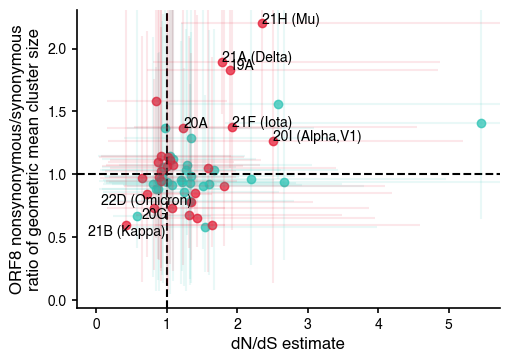

In [150]:
fig,ax = plt.subplots(layout='constrained',figsize=(5,3.5))
ax.axvline(x=1,ls='dashed',color='k')
ax.axhline(y=1,ls='dashed',color='k')
for mutType,color,label in zip(['missense','nonsense'],['#2EC4B6','#e71d36'],['Missense','Nonsense']):
    filt = selection[selection.mut_type==mutType]
    ax.scatter(filt['dnds'],filt['scaled'],color=color,alpha=0.7,label=label)
    ax.errorbar(filt['dnds'],filt['scaled'],xerr=[filt['min_dnds'],filt['max_dnds']],yerr=[filt['min_ci'],filt['max_ci']],color=color,fmt='o',alpha=0.1)
    winner = filt[(filt.dnds>1.2) & (filt.scaled>1.2) & (filt.scaled != np.inf)]
    loser = filt[(filt.dnds<0.9) & (filt.scaled<0.9)]
    if mutType =='nonsense':
        for row in winner.index:
            ax.text(x=winner.at[row,'dnds'],y=winner.at[row,'scaled'],s=winner.at[row,'clade'])
        for row in loser.index:
            ax.annotate(loser.at[row,'clade'],xy=(loser.at[row,'dnds'],loser.at[row,'scaled']),horizontalalignment='center',verticalalignment='top')
ax.set_xlabel('dN/dS estimate')
ax.set_ylabel('ORF8 nonsynonymous/synonymous\nratio of geometric mean cluster size')
fig.savefig('figs/supplemental/size_count_clade.pdf',dpi=300,bbox_inches='tight')

Text(0, 0.5, 'Geometric mean of nonsynonymous cluster size/\n geometric mean of synonymous cluster size')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


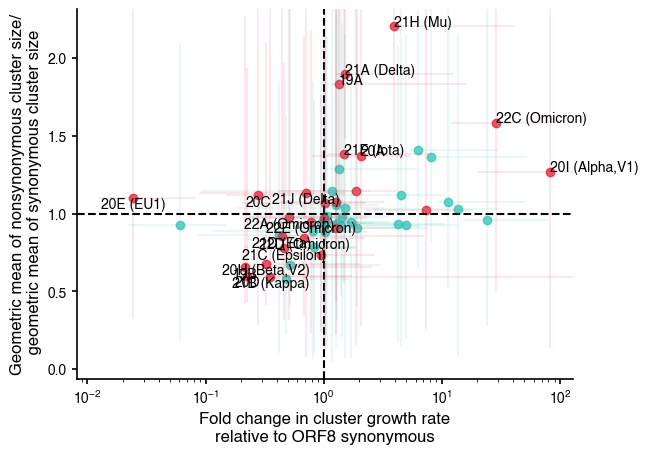

In [151]:
fig,ax = plt.subplots()
ax.axvline(x=1,ls='dashed',color='k')
ax.axhline(y=1,ls='dashed',color='k')
for mutType,color,label in zip(['missense','nonsense'],['#2EC4B6','#e71d36'],['Missense','Nonsense']):
    filt = selection[selection.mut_type==mutType]
    ax.scatter(filt['Fold_change'],filt['scaled'],color=color,alpha=0.7,label=label)
    ax.errorbar(filt['Fold_change'],filt['scaled'],xerr=[filt['deltaMin'],filt['deltaMax']],yerr=[filt['min_ci'],filt['max_ci']],color=color,fmt='o',alpha=0.1)
    ax.set_xscale('log')
    
    winner = filt[(filt.scaled>1.2)]
    loser = filt[(filt.Fold_change<0.8)]
    if mutType =='nonsense':
        for row in winner.index:
            ax.text(x=winner.at[row,'Fold_change'],y=winner.at[row,'scaled'],s=winner.at[row,'clade'])
        for row in loser.index:
            ax.annotate(loser.at[row,'clade'],xy=(loser.at[row,'Fold_change'],loser.at[row,'scaled']),horizontalalignment='center',verticalalignment='top')
ax.set_xlabel('Fold change in cluster growth rate\nrelative to ORF8 synonymous')
ax.set_ylabel('Geometric mean of nonsynonymous cluster size/\n geometric mean of synonymous cluster size')

In [ ]:
def plot_orf8(results,lineages,new_labels,path=None):
    maxv = max(max(results['dStop_dS_max']),max(results['dN_dS_max']))
    locs = {lin:i for i,lin in enumerate(lineages)}
    fig, ax = plt.subplots(tight_layout=True,figsize=(7.2,8),ncol=2)
    ax.axhline(y=1, ls='dashed',c='black',zorder=1)
    filt = results[(results.gene=='ORF8')]
    ax.bar(filt['clade'].map(locs)-0.4,filt['dN_dS'], width=0.4,color='#2ec4b6',label='Missense',ec='#22544E',zorder=2)
    ax.bar(filt['clade'].map(locs),filt['dStop_dS'],width=0.4,color='#e71d36',label='Nonsense',ec='#9B0431',zorder=2)
    ax.errorbar(filt['clade'].map(locs)-0.4, filt['dN_dS'],yerr=[filt['dN_dS']-filt['dN_dS_min'],filt['dN_dS_max']-filt['dN_dS']],ecolor='k',capsize=2,fmt='none')
    ax.errorbar(filt['clade'].map(locs), filt['dStop_dS'],yerr=[filt['dStop_dS']-filt['dStop_dS_min'],filt['dStop_dS_max']-filt['dStop_dS']],ecolor='k',capsize=2,fmt='none')
        
    ax.set_ylabel('ORF8 dN/dS estimate')
    ax.legend(title='Mutation type',frameon=False)
    ax.set_yscale('log')
    ax.set_ylim(-0.05,10)
    #ax.set_ylim(-0.05,2.6)
    labels = [lin if lin not in new_labels.keys() else new_labels[lin] for lin in lineages]
    ax.set_xticks([locs[x]-0.2 for x in lineages],labels=labels,rotation=90)
    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

<AxesSubplot: xlabel='synRatio', ylabel='Count'>

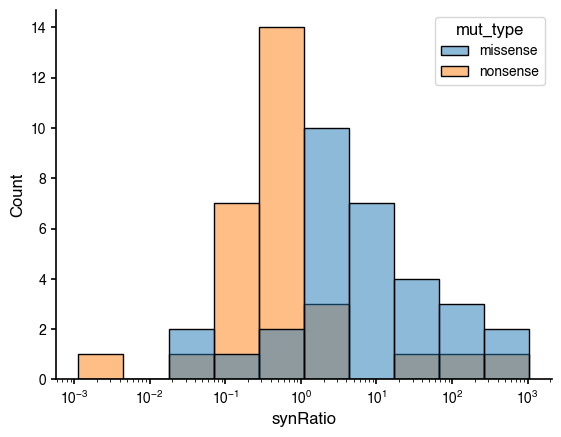

In [22]:
sns.histplot(ratios,x='synRatio',hue='mut_type',log_scale=True)

In [11]:
ratios

,clade,mut_type,synRatio
0,19A,missense,158.365854
1,19A,nonsense,0.707317
2,19B,missense,11.316667
3,19B,nonsense,0.100000
4,20A,missense,44.068828
5,20A,nonsense,0.837315
6,20B,missense,121.449153
7,20B,nonsense,0.505448
8,20C,missense,5.145966
9,20C,nonsense,0.029918
